In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
data_df1 = pd.read_excel('DC_Compensation_041123.xlsx', sheet_name='Trial 1')
data_df1

,Trial 1,y_comp,x_comp,color
0,1,0.00,0,darkblue
1,2,0.01,0,red
2,3,-0.01,0,green
3,4,-0.05,0,lightblue
4,5,-0.10,0,orange
5,6,-0.15,0,purple
6,7,-0.20,0,cyan


In [15]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0, 0.5, 'Shifted counts')

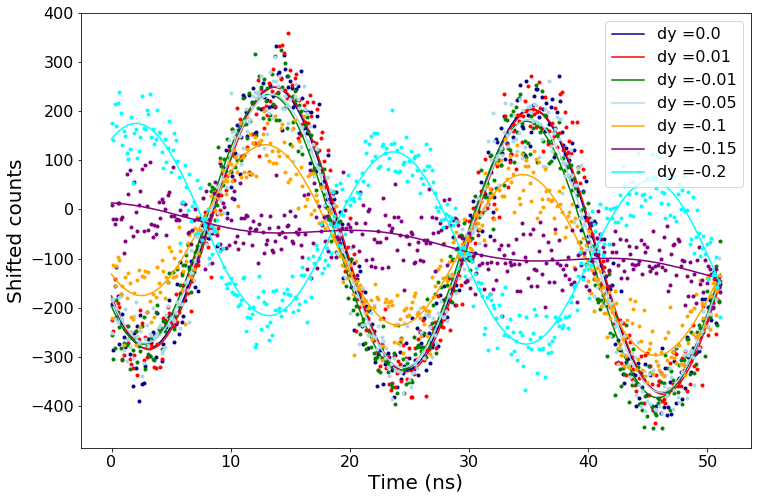

In [37]:
from scipy import optimize

def test_func(x, a, phi, c, d):
    b = 46.3335/1000*2*np.pi
    return a * np.sin(b * x + phi) + c * x + d
data = np.genfromtxt('20230411_picoharp/Trial1.dat', skip_header=10)
cut = 400
time = np.array([0.128*i for i in range(cut)])
plt.figure(figsize = (12,8))

color = data_df1['color']
label = ['dy ='+str(data_df1['y_comp'][i]) for i in range(len(data_df1))]
popts = []
for i in range(len(data_df1)):
    y_data = data[:cut,i]
    popt, pcov = optimize.curve_fit(test_func, time, y_data, p0=[0, np.pi, -2, 1800])
    plt.plot(time, y_data-popt[-1], '.',color = color[i])
    plt.plot(time, test_func(time, *popt)-popt[-1],'-',color = color[i], label = label[i])
    popts.append(popt)
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Shifted counts')
# print(popt)

Zero amplitude is at dy =  -0.14263000229722325


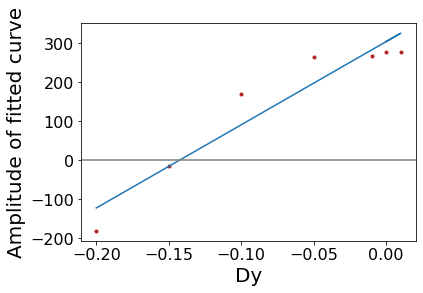

In [38]:
dy = np.array(data_df1['y_comp'])
def lin_func(x, a, b):
    return a * x + b
y_data = np.array(popts)[:,0]
popt, pcov = optimize.curve_fit(lin_func, dy, y_data, p0=[-1, -100])
plt.plot(dy, np.array(popts)[:,0],'.', color = 'firebrick')
plt.plot(dy, lin_func(dy, *popt))
plt.axhline(y=0,color = 'grey')
plt.xlabel('Dy')
plt.ylabel('Amplitude of fitted curve')
print('Zero amplitude is at dy = ',-popt[1]/popt[0])

In [39]:
data_df2 = pd.read_excel('DC_Compensation_041123.xlsx', sheet_name='Trial 2')
data_df2

,Trial 2,y_comp,x_comp,color
0,1,-0.149,0,darkblue
1,2,-0.169,0,red
2,3,-0.189,0,green
3,4,-0.199,0,lightblue
4,5,-0.209,0,orange


Text(0, 0.5, 'Shifted counts')

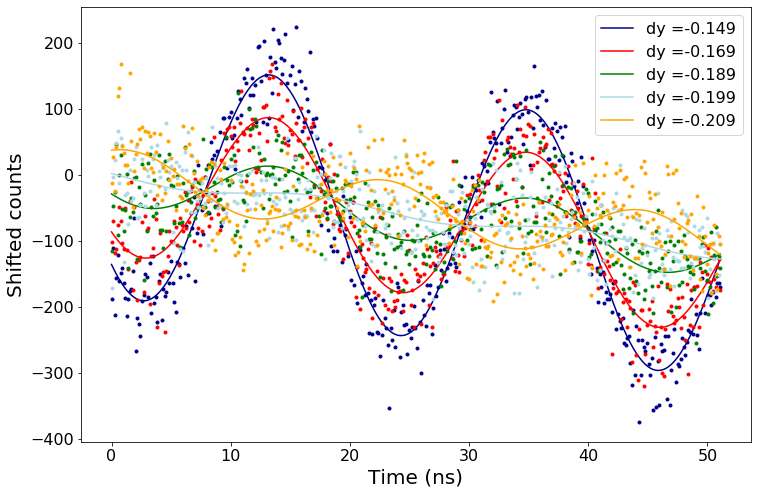

In [32]:
def test_func(x, a, phi, c, d):
    b = 46.3335/1000*2*np.pi
    return a * np.sin(b * x + phi) + c * x + d
data = np.genfromtxt('20230411_picoharp/Trial2.dat', skip_header=10)
cut = 400
time = np.array([0.128*i for i in range(cut)])
plt.figure(figsize = (12,8))

color = data_df2['color']
label = ['dy ='+str(data_df2['y_comp'][i]) for i in range(len(data_df2))]
popts = []
for i in range(len(data_df2)):
    y_data = data[:cut,i]
    popt, pcov = optimize.curve_fit(test_func, time, y_data, p0=[0, np.pi, -2, 1800])
    plt.plot(time, y_data-popt[-1], '.',color = color[i])
    plt.plot(time, test_func(time, *popt)-popt[-1],'-',color = color[i], label = label[i])
    popts.append(popt)
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Shifted counts')
# print(popt)

Zero amplitude is at dy =  -0.20004180759081747


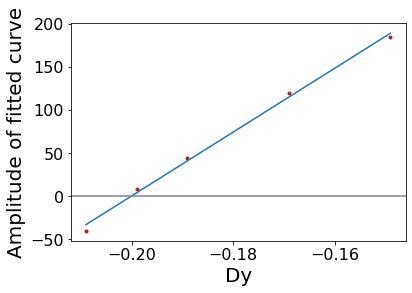

In [33]:
dy = np.array(data_df2['y_comp'])
def lin_func(x, a, b):
    return a * x + b
y_data = np.array(popts)[:,0]
popt, pcov = optimize.curve_fit(lin_func, dy, y_data, p0=[1, -100])
plt.plot(dy, np.array(popts)[:,0],'.', color = 'firebrick')
plt.plot(dy, lin_func(dy, *popt))
plt.axhline(y=0,color = 'grey')
plt.xlabel('Dy')
plt.ylabel('Amplitude of fitted curve')
print('Zero amplitude is at dy = ',-popt[1]/popt[0])

In [34]:
data_df3 = pd.read_excel('DC_Compensation_041123.xlsx', sheet_name='Trial 3')
data_df3

,Trial 3,y_comp,x_comp,color
0,1,-0.204,0,darkblue
1,2,-0.224,0,red
2,3,-0.234,0,green


Text(0, 0.5, 'Shifted counts')

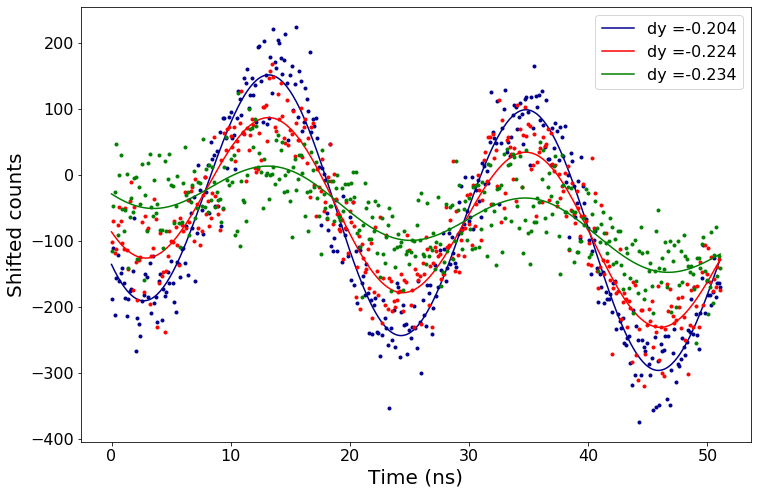

In [35]:
def test_func(x, a, phi, c, d):
    b = 46.3335/1000*2*np.pi
    return a * np.sin(b * x + phi) + c * x + d
data = np.genfromtxt('20230411_picoharp/Trial2.dat', skip_header=10)
cut = 400
time = np.array([0.128*i for i in range(cut)])
plt.figure(figsize = (12,8))

color = data_df3['color']
label = ['dy ='+str(data_df3['y_comp'][i]) for i in range(len(data_df3))]
popts = []
for i in range(len(data_df3)):
    y_data = data[:cut,i]
    popt, pcov = optimize.curve_fit(test_func, time, y_data, p0=[0, np.pi, -2, 1800])
    plt.plot(time, y_data-popt[-1], '.',color = color[i])
    plt.plot(time, test_func(time, *popt)-popt[-1],'-',color = color[i], label = label[i])
    popts.append(popt)
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Shifted counts')
# print(popt)

Zero amplitude is at dy =  -0.24648252401611973


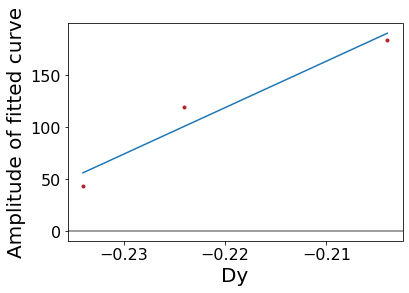

In [36]:
dy = np.array(data_df3['y_comp'])
def lin_func(x, a, b):
    return a * x + b
y_data = np.array(popts)[:,0]
popt, pcov = optimize.curve_fit(lin_func, dy, y_data, p0=[-1, -100])
plt.plot(dy, np.array(popts)[:,0],'.', color = 'firebrick')
plt.plot(dy, lin_func(dy, *popt))
plt.axhline(y=0,color = 'grey')
plt.xlabel('Dy')
plt.ylabel('Amplitude of fitted curve')
print('Zero amplitude is at dy = ',-popt[1]/popt[0])